<a href="https://colab.research.google.com/github/rohithmsr/A-December-of-Algorithms-2020/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Use the diabetes data set from UCI and Pima Indians Diabetes data set for 
performing the following:

(i) Univariate  analysis:  Frequency,  Mean,  Median,  Mode,  Variance,  Standard Deviation, Skewness and Kurtosis.

(ii) Bivariate analysis: Linear and logistic regression modeling 


(iii) Multiple Regression analysis 

(iv) Also compare the results of the above analysis for the two data sets.

# **Reading from Dataset**

In [9]:
data = pd.read_csv("./Data/pima-diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Checking the dataset**

In [28]:
print("No of columns with empty values = ", data.isnull().any().sum())

No of columns with empty values =  0


# **Univariate Analysis**

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the above description,

**Frequency** = count column, no of values in the column

**Mean** = average of the values 

**Median** = 50th percentile given in the column is the median

**Standard Deviation** = std column 


In [16]:
# Mode

data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [20]:
# Variance

data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [21]:
# Skewness 

data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [22]:
# Kurtosis

data.kurtosis()


Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

### Correlation


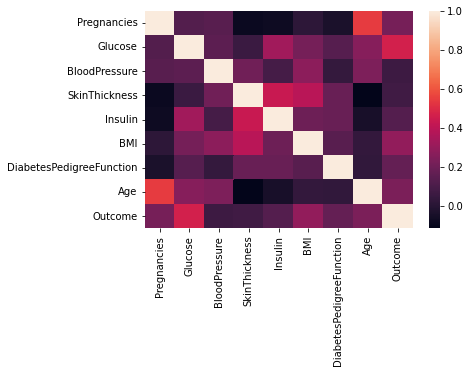

In [24]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Bivariate Analysis

### Linear Regression

In [33]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
X = np.array(data['Glucose']).reshape(-1, 1)
y = np.array(data['Insulin']).reshape(-1, 1)
  
# Dropping any rows with Nan values
data.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
  
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.03820640375674844


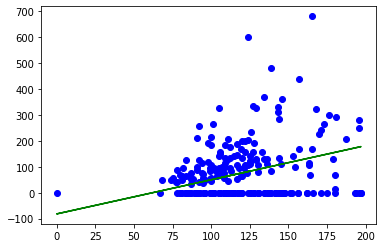

In [34]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='g')
  
plt.show()

## Logistic Regression -

Input values (X) are combined linearly using weights or coefficient values to predict an output value (y).

The output value being modeled is a binary value (0 or 1) rather than a numeric value.

## Linear Regression Equation:

y = β0 + β1X1 + β2X2 …. + βnXn

Where,

y stands for the dependent variable that needs to be predicted.

β0 is the Y-intercept, which is basically the point on the line which touches the y-axis.

β1 is the slope of the line (the slope can be negative or positive depending on the relationship between the dependent variable and the independent variable.)

X here represents the independent variable that is used to predict our resultant dependent value.

## Sigmoid function:

z = 1 / 1 + e - y

Apply sigmoid function on the linear regression equation.

## Logistic Regression equation:

z = 1 / 1 + e-(β0 + β1X1 + β2X2 …. + βnXn)

β0 = β0 + learning_rate (y - z) z (1 - z)

βi = βi + learning_rate (y - z) z (1 - z) X

## Sklearn Logistic Regression



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

diabetes_df = data.values
X = diabetes_df[:,0:8] #Predictors
y = diabetes_df[:,8] #Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

logistic_model = LogisticRegression(fit_intercept=True,C=1e15)
logistic_model.fit(X_train,y_train)
predicted = logistic_model.predict(X_test)

print("Confusion Matrix")
matrix = confusion_matrix(y_test,predicted)
print(matrix)

lr_accuracy = accuracy_score(y_test, predicted)
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

Confusion Matrix
[[146  13]
 [ 24  48]]
Logistic Regression Accuracy of Scikit Model: 83.98%
